In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('KDH-Historical-Data.csv')
df

,Unnamed: 0,Date,Price
0,0,2017-01-03,9198.4
1,1,2017-01-04,9198.4
2,2,2017-01-05,8944.8
3,3,2017-01-06,9083.2
4,4,2017-01-07,9106.2
...,...,...,...
2702,2702,2024-05-28,36250.0
2703,2703,2024-05-29,35700.0
2704,2704,2024-05-30,36050.0
2705,2705,2024-05-31,36200.0


In [3]:
df = df.reset_index()['Price']
df

0        9198.4
1        9198.4
2        8944.8
3        9083.2
4        9106.2
         ...   
2702    36250.0
2703    35700.0
2704    36050.0
2705    36200.0
2706    36000.0
Name: Price, Length: 2707, dtype: float64

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [5]:
#Split train:test 7:3
train_size_7_3 = int(0.7 * len(df))
test_size_7_3 = len(df) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

In [6]:
#Split train:test 8:2
train_size_8_2 = int(0.8 * len(df))
test_size_8_2 = len(df) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

In [7]:
#Split train:test 9:1
train_size_9_1 = int(0.9 * len(df))
test_size_9_1 = len(df) - train_size_9_1

train_data_9_1 = df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step = 100

x_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
x_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

x_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
x_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

x_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
x_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [10]:
def forecast_future_days(model, test_data, time_step, pred_days):
    x_input = test_data[len(test_data)-time_step:].reshape(1,-1)
    temp_input = list(x_input[0].tolist())
    xgb_output = []

    for i in range(pred_days):
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)

            yhat = model.predict(x_input)
            print("{} day output {}".format(i, yhat))

            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]

            xgb_output.extend(yhat.tolist())
        else:
            yhat = model.predict(x_input)
            print("{} day output {}".format(i, yhat))

            temp_input.extend(yhat.tolist())
            xgb_output.extend(yhat.tolist())

    return xgb_output

## 7:3 ratio

In [11]:
#Build model
model_7_3 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [12]:
model_7_3.fit(x_train_7_3, y_train_7_3, eval_set=[(x_test_7_3, y_test_7_3)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred_7_3 = model_7_3.predict(x_test_7_3)
y_pred_7_3

array([0.7071388 , 0.7071388 , 0.7071388 , 0.7071388 , 0.70590836,
       0.7071388 , 0.7071388 , 0.70590836, 0.7071388 , 0.7071388 ,
       0.7071388 , 0.7049827 , 0.7071388 , 0.7071388 , 0.7049827 ,
       0.70590836, 0.7071388 , 0.7071388 , 0.7071388 , 0.7071388 ,
       0.7071388 , 0.7071388 , 0.7049827 , 0.7071388 , 0.7071388 ,
       0.7071388 , 0.7071388 , 0.7071388 , 0.7071388 , 0.7071388 ,
       0.7071388 , 0.7071388 , 0.7071388 , 0.7071388 , 0.7078983 ,
       0.70590836, 0.7037523 , 0.70590836, 0.70590836, 0.68563145,
       0.7066679 , 0.7066679 , 0.677684  , 0.7045118 , 0.69423497,
       0.68104744, 0.68242186, 0.6671269 , 0.64832205, 0.6402829 ,
       0.6402515 , 0.64275855, 0.6297742 , 0.6199332 , 0.6357378 ,
       0.6234677 , 0.6070806 , 0.6088447 , 0.6108752 , 0.62332517,
       0.6129077 , 0.6119888 , 0.6203288 , 0.6085876 , 0.60476434,
       0.59592193, 0.602031  , 0.62238276, 0.594837  , 0.608192  ,
       0.6363203 , 0.58859646, 0.5981274 , 0.5768338 , 0.57814

In [14]:
#Forecast 30 days
forecast_30days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 30)
#Forecast 60 days
forecast_60days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 60)
#Forecast 90 days
forecast_90days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 90)

0 day output [0.65539265]
1 day output [0.6787025]
2 day output [0.68188214]
3 day output [0.6838754]
4 day output [0.6838754]
5 day output [0.6817193]
6 day output [0.6838754]
7 day output [0.6838754]
8 day output [0.69727874]
9 day output [0.7249015]
10 day output [0.7059125]
11 day output [0.70863885]
12 day output [0.7059125]
13 day output [0.7059125]
14 day output [0.7059125]
15 day output [0.7059125]
16 day output [0.7059125]
17 day output [0.7059125]
18 day output [0.7059125]
19 day output [0.7059125]
20 day output [0.70904535]
21 day output [0.73019046]
22 day output [0.74114114]
23 day output [0.76510024]
24 day output [0.7784724]
25 day output [0.7661787]
26 day output [0.7784724]
27 day output [0.778963]
28 day output [0.77583015]
29 day output [0.7543031]
0 day output [0.65539265]
1 day output [0.6787025]
2 day output [0.68188214]
3 day output [0.6838754]
4 day output [0.6838754]
5 day output [0.6817193]
6 day output [0.6838754]
7 day output [0.6838754]
8 day output [0.6972

In [15]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
y_pred_7_3

array([[39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39080.875],
       [39133.402],
       [39133.402],
       [39080.875],
       [39133.402],
       [39133.402],
       [39133.402],
       [39041.355],
       [39133.402],
       [39133.402],
       [39041.355],
       [39080.875],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39041.355],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39133.402],
       [39165.83 ],
       [39080.875],
       [38988.83 ],
       [39080.875],
       [39080.875],
       [38215.23 ],
       [39113.3  ],
       [39113.3  ],
       [37875.94 ],
       [39021.254],
       [38582.523],
       [38019.53 ],
       [38078.207],
       [37425.246],
       [36622.445],
       [36279.246],


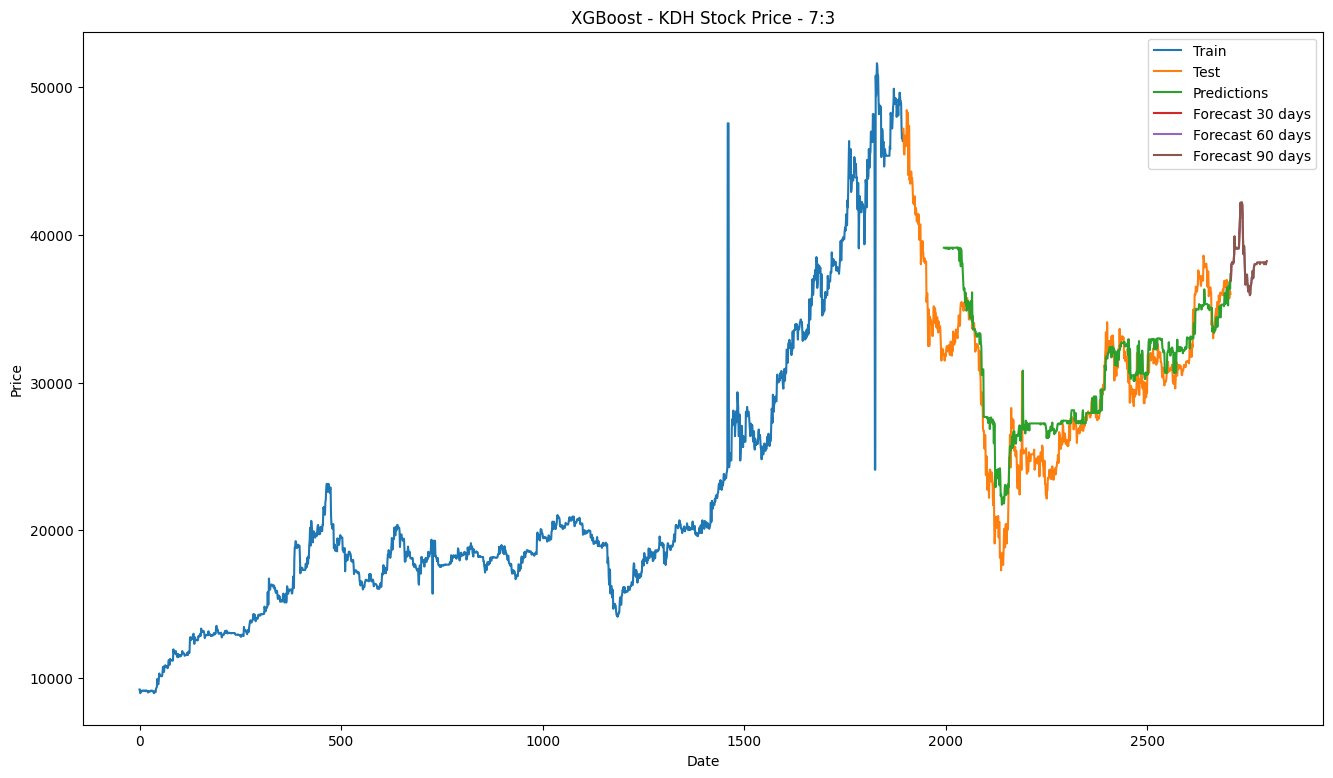

In [16]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))
test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))
predict_data_index = pd.RangeIndex(start=train_size_7_3 + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), step=1)
plt.plot(predict_data_index,y_pred_7_3)
forecast_data_30_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_30days_7_3), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_7_3).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_60days_7_3), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_7_3).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_90days_7_3), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_7_3).reshape(-1,1)))

plt.title('XGBoost - KDH Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [17]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 2416.2440761565645
MAE: 1789.4221440118795
MAPE: 0.0652570023845316


## 8:2 ratio

In [18]:
model_8_2 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [19]:
model_8_2.fit(x_train_8_2, y_train_8_2, eval_set=[(x_test_8_2, y_test_8_2)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

array([0.3963542 , 0.38305995, 0.39054012, 0.34921327, 0.3543282 ,
       0.3452314 , 0.33775124, 0.37194908, 0.3472455 , 0.36180836,
       0.38524333, 0.38725743, 0.3963542 , 0.40383437, 0.40383437,
       0.40383437, 0.40383437, 0.40383437, 0.40383437, 0.40383437,
       0.40383437, 0.40383437, 0.40383437, 0.40383437, 0.40383437,
       0.40383437, 0.41969743, 0.41208938, 0.40383437, 0.40686423,
       0.40383437, 0.40383437, 0.40383437, 0.40383437, 0.40383437,
       0.40383437, 0.40383437, 0.40383437, 0.40383437, 0.40383437,
       0.40383437, 0.40383437, 0.41208938, 0.40383437, 0.40383437,
       0.43510333, 0.43510333, 0.43510333, 0.4385179 , 0.4385179 ,
       0.4385179 , 0.4385179 , 0.423112  , 0.41550395, 0.41550395,
       0.4227273 , 0.43510333, 0.41969743, 0.4227273 , 0.41550395,
       0.40686423, 0.40686423, 0.40383437, 0.40383437, 0.40383437,
       0.40383437, 0.41208938, 0.40383437, 0.40383437, 0.40383437,
       0.41208938, 0.40383437, 0.40383437, 0.41969743, 0.43510

In [21]:
#Forecast 30 days
forecast_30days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 30)
#Predict 60 days
forecast_60days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 60)
#Predict 90 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 90)

0 day output [0.6400977]
1 day output [0.64051217]
2 day output [0.6419973]
3 day output [0.6419973]
4 day output [0.6419973]
5 day output [0.6419973]
6 day output [0.6419973]
7 day output [0.6417495]
8 day output [0.6419973]
9 day output [0.64051217]
10 day output [0.6417495]
11 day output [0.6419973]
12 day output [0.6417495]
13 day output [0.6419973]
14 day output [0.6419973]
15 day output [0.6419973]
16 day output [0.6419973]
17 day output [0.6419973]
18 day output [0.6419973]
19 day output [0.64051217]
20 day output [0.6419973]
21 day output [0.6419973]
22 day output [0.64051217]
23 day output [0.6419973]
24 day output [0.64051217]
25 day output [0.6419973]
26 day output [0.6419973]
27 day output [0.6419973]
28 day output [0.6419973]
29 day output [0.6419973]
0 day output [0.6400977]
1 day output [0.64051217]
2 day output [0.6419973]
3 day output [0.6419973]
4 day output [0.6419973]
5 day output [0.6419973]
6 day output [0.6419973]
7 day output [0.6417495]
8 day output [0.6419973]

In [22]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[25865.637],
       [25298.09 ],
       [25617.426],
       [23853.135],
       [24071.496],
       [23683.143],
       [23363.807],
       [24823.752],
       [23769.127],
       [24390.832],
       [25391.3  ],
       [25477.285],
       [25865.637],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26862.188],
       [26537.39 ],
       [26184.975],
       [26314.322],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26184.975],
       [26537.39 ],
       [26184.975],
       [26184.975],
       [27519.885],
       [27519.885],
       [27519.885],
       [27665.656],
       [27665.656],


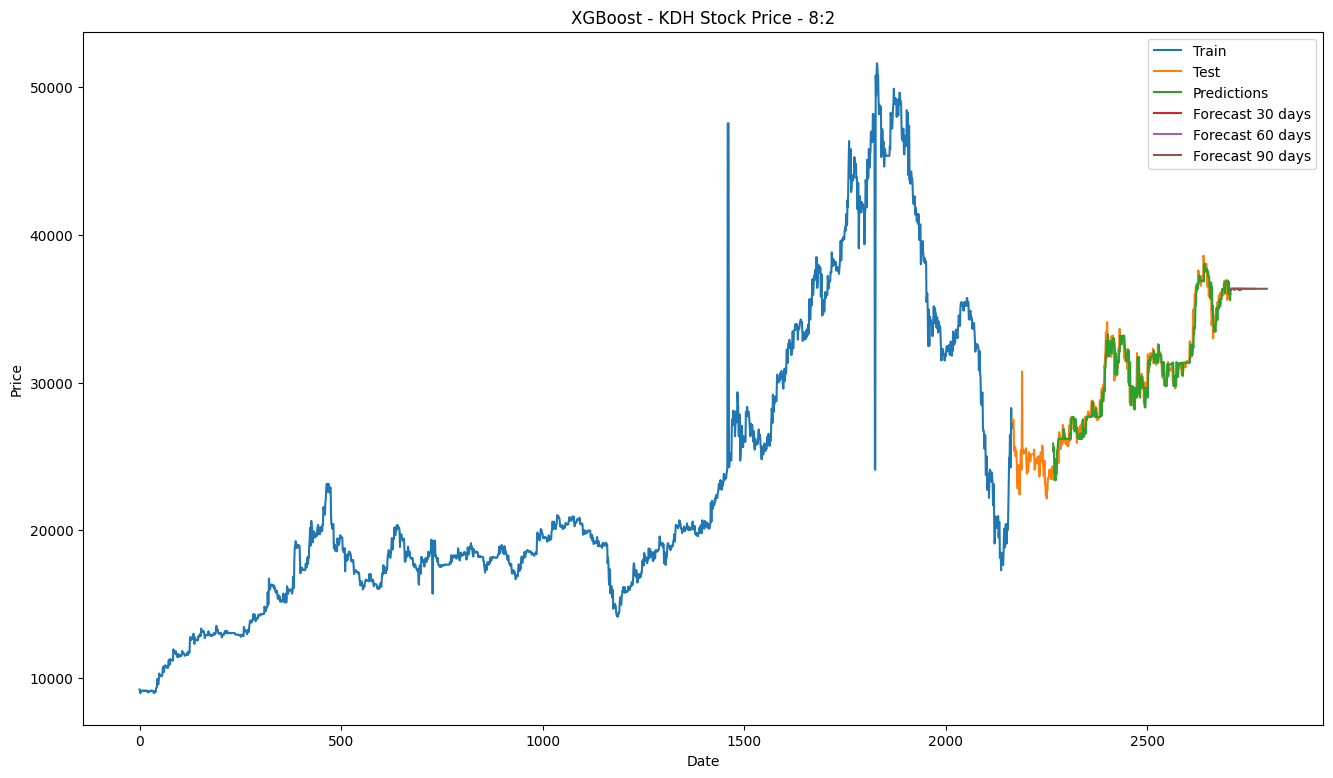

In [23]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('XGBoost - KDH Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [24]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 672.2228623212611
MAE: 475.3558097718254
MAPE: 0.015613936731771163


## 9:1 ratio

In [25]:
model_9_1 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [26]:
model_9_1.fit(x_train_9_1, y_train_9_1, eval_set=[(x_test_9_1, y_test_9_1)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred_9_1 = model_9_1.predict(x_test_9_1)
y_pred_9_1

array([0.52326155, 0.51495004, 0.50959545, 0.5102828 , 0.5156374 ,
       0.51495004, 0.50959545, 0.48458555, 0.5019713 , 0.5019713 ,
       0.5019713 , 0.5019713 , 0.5019713 , 0.5019713 , 0.5019713 ,
       0.5019713 , 0.5265583 , 0.5073259 , 0.50959545, 0.5102828 ,
       0.5073259 , 0.51495004, 0.51790696, 0.52326155, 0.52326155,
       0.52326155, 0.52326155, 0.51495004, 0.50959545, 0.5019713 ,
       0.5019713 , 0.5019713 , 0.5019713 , 0.48458555, 0.48458555,
       0.5019713 , 0.5102828 , 0.53191286, 0.51495004, 0.50959545,
       0.5102828 , 0.5156374 , 0.52326155, 0.52326155, 0.52326155,
       0.52326155, 0.52326155, 0.52326155, 0.52326155, 0.52326155,
       0.51495004, 0.50959545, 0.5019713 , 0.5019713 , 0.50959545,
       0.52326155, 0.52326155, 0.52326155, 0.52326155, 0.52326155,
       0.52326155, 0.539537  , 0.539537  , 0.539537  , 0.539537  ,
       0.539537  , 0.539537  , 0.539537  , 0.52326155, 0.539537  ,
       0.55152607, 0.5506439 , 0.5407686 , 0.54230475, 0.54230

In [28]:
#Forecast 30 days
forecast_30days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 30)
#Predict 60 days
forecast_60days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 60)
#Predict 90 days
forecast_90days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 90)

0 day output [0.63836724]
1 day output [0.63836724]
2 day output [0.63836724]
3 day output [0.63836724]
4 day output [0.63836724]
5 day output [0.63836724]
6 day output [0.63941187]
7 day output [0.63917124]
8 day output [0.63836724]
9 day output [0.63836724]
10 day output [0.63917124]
11 day output [0.63836724]
12 day output [0.6374269]
13 day output [0.64011157]
14 day output [0.63836724]
15 day output [0.63836724]
16 day output [0.63836724]
17 day output [0.63836724]
18 day output [0.63836724]
19 day output [0.63836724]
20 day output [0.63836724]
21 day output [0.63836724]
22 day output [0.63836724]
23 day output [0.63836724]
24 day output [0.63836724]
25 day output [0.63836724]
26 day output [0.63836724]
27 day output [0.63836724]
28 day output [0.63836724]
29 day output [0.63836724]
0 day output [0.63836724]
1 day output [0.63836724]
2 day output [0.63836724]
3 day output [0.63836724]
4 day output [0.63836724]
5 day output [0.63836724]
6 day output [0.63941187]
7 day output [0.639

In [29]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
y_pred_9_1

array([[31283.463],
       [30928.635],
       [30700.041],
       [30729.385],
       [30957.979],
       [30928.635],
       [30700.041],
       [29632.34 ],
       [30374.557],
       [30374.557],
       [30374.557],
       [30374.557],
       [30374.557],
       [30374.557],
       [30374.557],
       [30374.557],
       [31424.205],
       [30603.15 ],
       [30700.041],
       [30729.385],
       [30603.15 ],
       [30928.635],
       [31054.87 ],
       [31283.463],
       [31283.463],
       [31283.463],
       [31283.463],
       [30928.635],
       [30700.041],
       [30374.557],
       [30374.557],
       [30374.557],
       [30374.557],
       [29632.34 ],
       [29632.34 ],
       [30374.557],
       [30729.385],
       [31652.797],
       [30928.635],
       [30700.041],
       [30729.385],
       [30957.979],
       [31283.463],
       [31283.463],
       [31283.463],
       [31283.463],
       [31283.463],
       [31283.463],
       [31283.463],
       [31283.463],


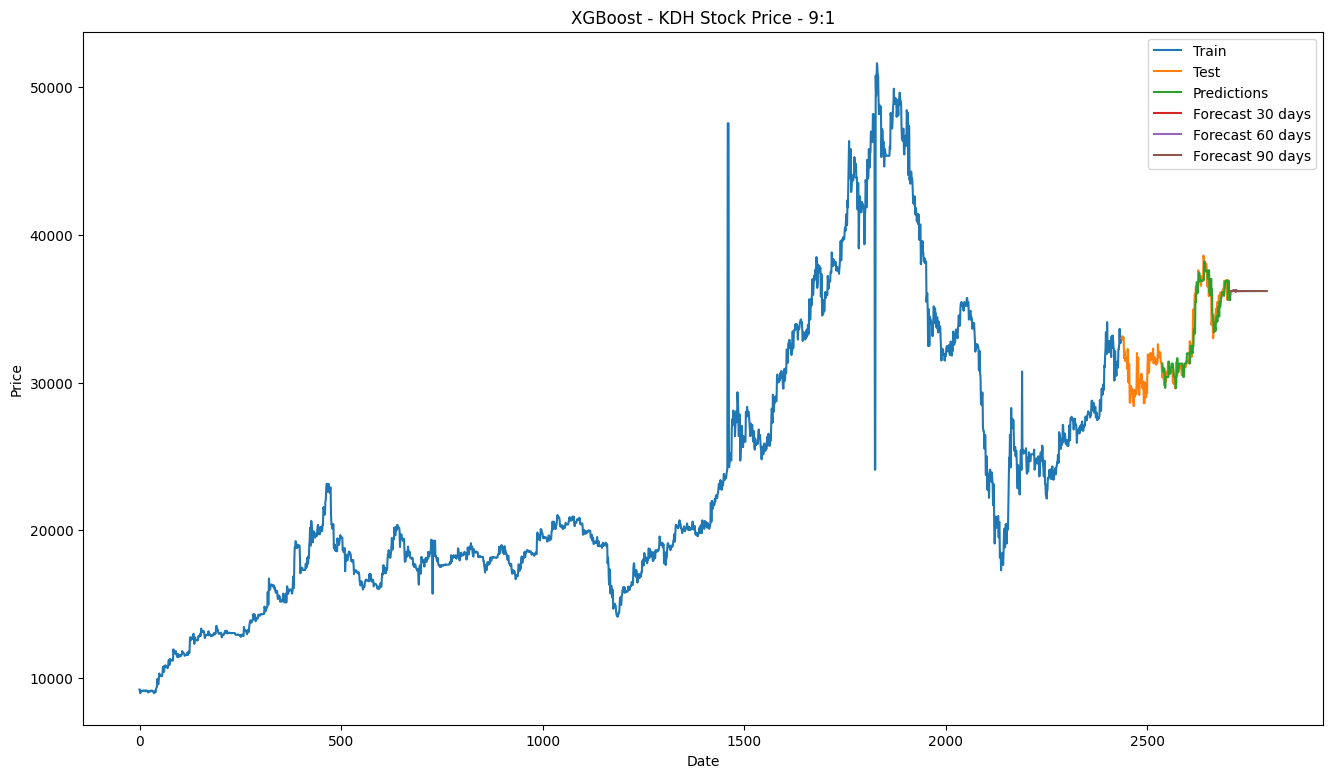

In [30]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))
test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+len(test_data_9_1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))
predict_data_index = pd.RangeIndex(start=train_size_9_1 + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), step=1)
plt.plot(predict_data_index,y_pred_9_1)
forecast_data_30_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_30days_9_1), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_9_1).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_60days_9_1), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_9_1).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_90days_9_1), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_9_1).reshape(-1,1)))

plt.title('XGBoost - KDH Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [31]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 601.8973282301288
MAE: 437.91755514705875
MAPE: 0.013013288518619473
